In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
import requests
import pandas as pd

In [2]:
def get_historic_price(symbol, after='2018-09-01'):

    url = 'https://api.kraken.com/0/public/OHLC'
    pair = f"{symbol.upper()}USD" # XBTUSD when symbol='xbt' for example

    resp = requests.get(url, params={
        "pair": pair,
        'interval': 60,
        'since': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()

    data = resp.json()

    results_key = [k for k in data['result'].keys() if k != 'last'][0]
    results = [
        (close_time, float(open), float(high), float(low), float(close), float(volume))
        for (close_time, open, high, low, close, vwap, volume, count)
        in data['result'][results_key]
    ]
    df = pd.DataFrame(results, columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

I will now pull data from Bitcoin and Ether, two of the most popular cryptocurrencies, for the last 7 days:

In [27]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(90))
last_week

Timestamp('2025-02-25 14:39:03.062407')

In [28]:
btc = get_historic_price('btc', after=last_week)

In [5]:
eth = get_historic_price('eth', after=last_week)

**Bitcoin:**

In [6]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
CloseTime,,,,,
2025-05-19 15:00:00,104285.7,104943.0,104285.6,104800.0,89.807293
2025-05-19 16:00:00,104800.0,105400.0,104538.7,105368.8,191.740723
2025-05-19 17:00:00,105368.8,105500.0,104946.9,105372.0,88.941436
2025-05-19 18:00:00,105372.0,105500.0,104722.9,104782.0,76.432641
2025-05-19 19:00:00,104782.0,105521.0,104704.7,105521.0,78.967605


In [7]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 2025-05-19 15:00:00 to 2025-05-26 14:00:00
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OpenPrice   168 non-null    float64
 1   HighPrice   168 non-null    float64
 2   LowPrice    168 non-null    float64
 3   ClosePrice  168 non-null    float64
 4   Volume      168 non-null    float64
dtypes: float64(5)
memory usage: 7.9 KB


In [11]:
btc.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
count,168.000000,168.000000,168.00000,168.000000,168.000000
mean,108296.382143,108640.380357,107990.61250,108328.647024,73.227042
std,1949.256168,1925.872228,1944.08442,1926.074404,77.725388
min,104285.700000,104852.400000,104269.00000,104502.000000,2.432339
25%,106901.525000,107262.550000,106515.55000,106951.600000,21.024659
50%,108254.400000,108621.700000,107972.00000,108258.800000,50.609067
75%,109707.300000,109986.775000,109585.00000,109707.225000,90.448617
max,111799.900000,111983.200000,111436.70000,111799.800000,456.931006


<Axes: xlabel='CloseTime'>

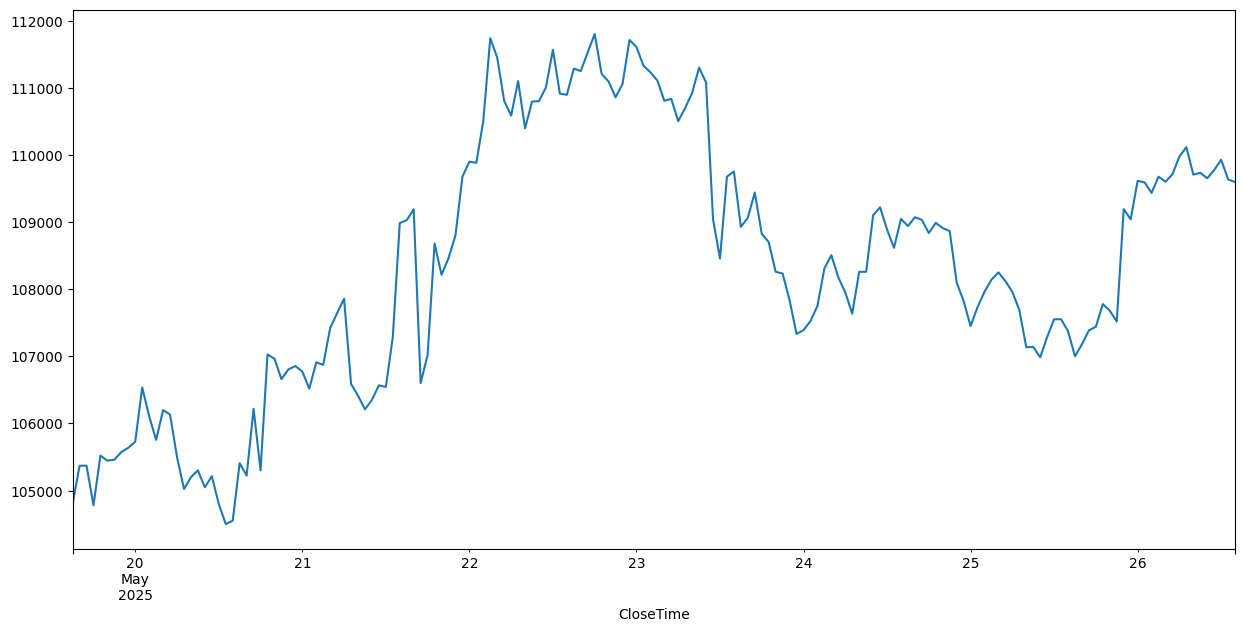

In [8]:
btc['ClosePrice'].plot(figsize=(15, 7))

**Ether:**

In [9]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
CloseTime,,,,,
2025-05-19 15:00:00,2447.77,2471.93,2445.08,2467.95,577.784281
2025-05-19 16:00:00,2467.95,2508.54,2452.51,2508.54,1842.902542
2025-05-19 17:00:00,2508.55,2547.21,2503.09,2504.09,1438.686263
2025-05-19 18:00:00,2504.09,2517.34,2476.46,2489.27,1017.433461
2025-05-19 19:00:00,2489.28,2525.00,2480.81,2521.46,1305.761797


<Axes: xlabel='CloseTime'>

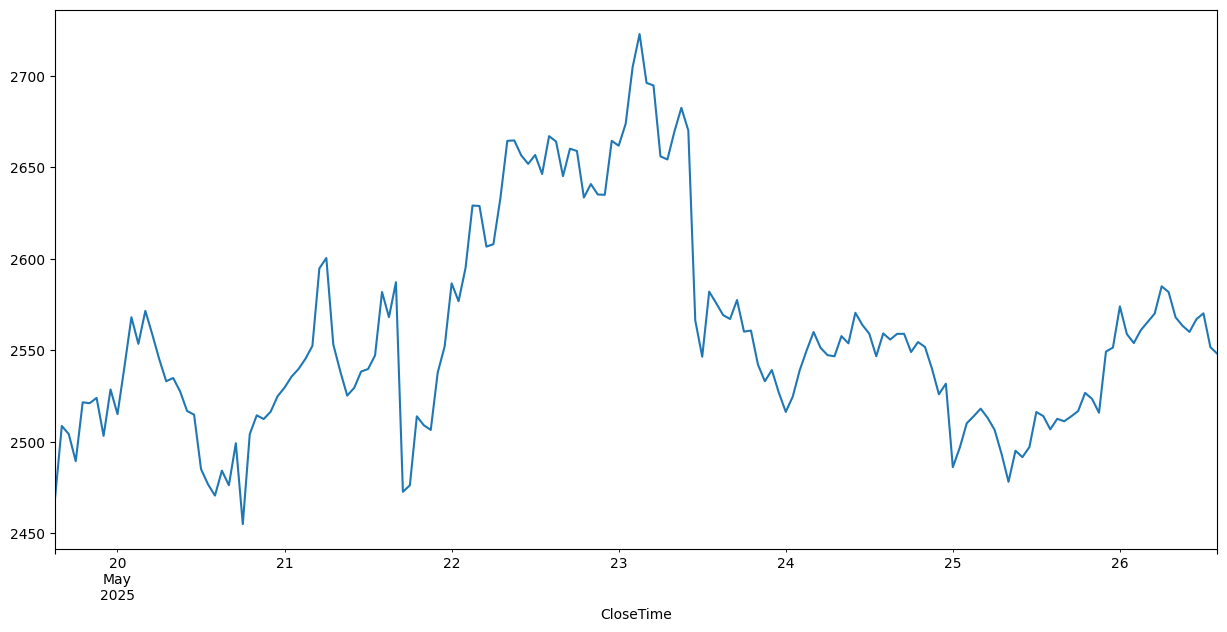

In [10]:
eth['ClosePrice'].plot(figsize=(15, 7))

As you can see, we're able to pull data from the internet with just a few lines, create a DataFrame and plot it all within Jupyter Lab.

In [ ]:
eth.head()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Bonus: Dynamic plots with Bokeh

We've also included [Bokeh](https://bokeh.pydata.org/) as part of this main distribution. Bokeh is a plotting library that generates interactive plots, that can be manipulated right within your browser.

We first need to import the libraries:

In [29]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
from bokeh.models import LegendItem, Legend

In [30]:
output_notebook()

And we generate the plot:

In [31]:
p1 = figure(x_axis_type="datetime", title="Bitcoin Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

# Add NumeralTickFormatter to the y-axis
p1.yaxis.formatter = NumeralTickFormatter(format='0,0.0k')

# Assign the line glyph renderer to a variable to use in LegendItem
btc_line = p1.line(btc.index, btc['ClosePrice'], color='#f2a900')

# Set the location of the legend after adding it
legend.location = "top_left"

show(p1)

☝️ as you can see, the plot is interactive. Try zomming in and out, and scrolling in the plot.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Part 4: Exporting to Excel

We're now ready to generate an Excel file from the downloaded prices. Working with Excel and other formats (like CSV or JSON) is extremely simple in Jupyter Lab (thanks to pandas and Python). Our first step will be to create an "Excel writer", a component from the `pandas` package:

In [32]:
writer = pd.ExcelWriter('cryptos.xlsx')

We'll now write both our Bitcoin and Ether data as separate sheets:

In [33]:
btc.to_excel(writer, sheet_name='Bitcoin')

In [34]:
eth.to_excel(writer, sheet_name='Ether')

And finally, we can save the file:

In [36]:
writer.close()

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)